In [340]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Descriptive Analysis

In [341]:
data = pd.read_csv('data/test.csv')
data

,Request_Date,Flight_Date,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency
0,2019-07-28T11:00:00Z,2019-07-29,18,2019-07-29 FR 146,SXF-STN,FR 146,73.43,€
1,2019-07-28T11:00:00Z,2019-07-29,22,2019-07-29 FR 8545,SXF-STN,FR 8545,180.53,€
2,2019-07-28T11:00:00Z,2019-07-30,6,2019-07-30 FR 144,SXF-STN,FR 144,61.19,€
3,2019-07-28T23:00:00Z,2019-07-30,6,2019-07-30 FR 144,SXF-STN,FR 144,73.43,€
4,2019-07-28T11:00:00Z,2019-07-30,10,2019-07-30 FR 8543,SXF-STN,FR 8543,180.53,€
...,...,...,...,...,...,...,...,...
5119,2019-07-31T23:00:00Z,2019-09-10,10,2019-09-10 FR 8543,SXF-STN,FR 8543,35.69,€
5120,2019-08-01T11:00:00Z,2019-09-10,10,2019-09-10 FR 8543,SXF-STN,FR 8543,35.69,€
5121,2019-08-01T23:00:00Z,2019-09-10,10,2019-09-10 FR 8543,SXF-STN,FR 8543,46.83,€
5122,2019-08-02T11:00:00Z,2019-09-10,10,2019-09-10 FR 8543,SXF-STN,FR 8543,46.83,€


In [342]:
##date is an object and has string format 
data.dtypes

Request_Date         object
Flight_Date          object
Departure_hour        int64
flight_unique_id     object
route_abb            object
flight_number        object
Price               float64
Currency             object
dtype: object

In [343]:
#data['Flight_Date'] = pd.to_datetime(data['Flight_Date'], format = '%Y-%m-%d')
#data

In [344]:
#Convert Object to datetime and change date format to YYYY-MM-DD
data['Flight_Date'] = pd.to_datetime(data['Flight_Date'])
data['Flight_Date'] = data['Flight_Date'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d')) 

In [345]:
data['Flight_Date'] = pd.to_datetime(data['Flight_Date']) #warum ist Flight_Date nach der Formatänderung erneut ein Object?
data.dtypes

Request_Date                object
Flight_Date         datetime64[ns]
Departure_hour               int64
flight_unique_id            object
route_abb                   object
flight_number               object
Price                      float64
Currency                    object
dtype: object

In [346]:
#Combine two columns, format them to string, cat() allows to use a seperator (Quelle: https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-dataframe-in-pandas-python)
data['flight_id'] = data['Flight_Date'].astype(str).str.cat(data['flight_number'].astype(str), sep=" ")

In [347]:
data.sample(n=5)

,Request_Date,Flight_Date,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency,flight_id
2577,2019-08-02T11:00:00Z,2019-08-22,6,2019-08-22 FR 8542,STN-SXF,FR 8542,31.10,£,2019-08-22 FR 8542
889,2019-07-28T23:00:00Z,2019-08-09,10,2019-08-09 FR 8543,SXF-STN,FR 8543,50.99,€,2019-08-09 FR 8543
5097,2019-08-01T23:00:00Z,2019-09-10,6,2019-09-10 FR 8542,STN-SXF,FR 8542,14.99,£,2019-09-10 FR 8542
279,2019-07-31T23:00:00Z,2019-08-04,18,2019-08-04 FR 146,SXF-STN,FR 146,152.99,€,2019-08-04 FR 146
1468,2019-07-30T11:00:00Z,2019-08-13,19,2019-08-13 FR 147,STN-SXF,FR 147,88.73,£,2019-08-13 FR 147


In [348]:
#pd.options.display.max_rows = None
#display(data)

In [371]:
#Calculate number of flights which have same Flight_Date
#data.sort_values(by='Flight_Date', ascending=True)[:]
freq_flights = data['Flight_Date'].value_counts()
print(freq_flights) #should be used for y-Axes of the plot; freq_flights is DataFrameGroupBy Object

2019-08-26    144
2019-09-05    144
2019-08-29    144
2019-08-13    144
2019-08-20    144
2019-08-12    144
2019-08-19    144
2019-09-03    144
2019-08-16    144
2019-08-23    144
2019-09-06    144
2019-08-15    144
2019-08-09    142
2019-08-30    142
2019-09-02    142
2019-09-09    142
2019-08-22    140
2019-08-08    140
2019-08-06    137
2019-08-27    136
2019-08-05    130
2019-09-08    120
2019-08-17    120
2019-08-31    120
2019-08-21    120
2019-08-25    120
2019-09-07    120
2019-08-18    120
2019-08-24    120
2019-08-11    120
2019-08-10    120
2019-08-14    120
2019-08-28    120
2019-09-04    117
2019-09-01    117
2019-08-07    113
2019-08-04     85
2019-08-02     84
2019-08-03     72
2019-09-10     48
2019-08-01     42
2019-07-31     15
2019-07-30     10
2019-07-29      2
Name: Flight_Date, dtype: int64


In [357]:
#Group flight dates by routes and return the counted value (Quelle: https://mode.com/python-tutorial/pandas-groupby-and-python-lambda-functions/)
group_by_route = data.groupby(['Flight_Date','route_abb'])
group_by_route.size().unstack()

route_abb,FRA-STN,STN-FRA,STN-SXF,SXF-STN
Flight_Date,,,,
2019-07-29,NaN,NaN,NaN,2.0
2019-07-30,NaN,NaN,NaN,10.0
2019-07-31,2.0,NaN,NaN,13.0
2019-08-01,11.0,4.0,1.0,26.0
2019-08-02,15.0,14.0,21.0,34.0
2019-08-03,19.0,12.0,10.0,31.0
2019-08-04,22.0,13.0,23.0,27.0
2019-08-05,24.0,19.0,41.0,46.0
2019-08-06,24.0,23.0,42.0,48.0


In [351]:
#fig, ax = plt.subplots()
#df = data.groupby(['Flight_Date']), group_by_route.median().plot(ax=ax)
#ax.legend()
#plt.show()

Number of total flights per Flight Date


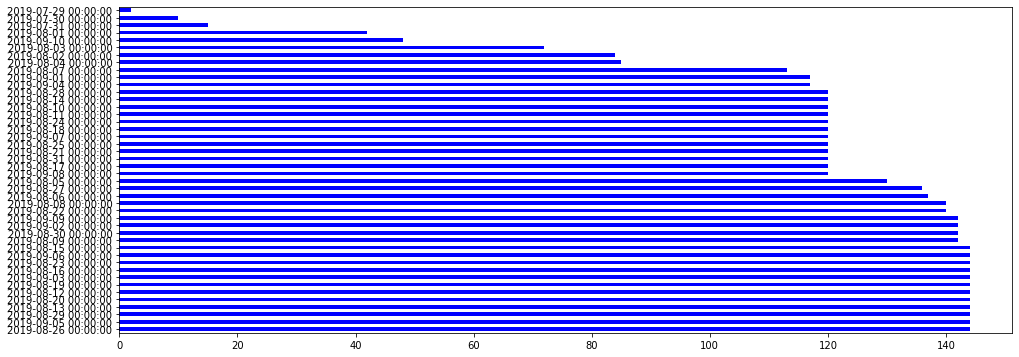

In [355]:
#Quelle(https://mode.com/python-tutorial/pandas-groupby-and-python-lambda-functions/)
print("Number of total flights per Flight Date")
freq_flights.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')
